# Project - California Housing Price Prediction

In [1]:
#Load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("C:\DataScienceClass\MachineLearning\housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


## Column Description

1. longitude                  Longitude value for the block in California, USA
2. latitude:                  Latitude value for the block in California, USA
3. housing_median_age:        Median age of the house in the block
4. total_rooms                Count of the total number of rooms (excluding bedrooms) in all houses in the block
5. total_bedrooms:            Count of the total number of bedrooms in all houses in the block
6. population:                Count of the total number of population in the block
7. households:                Count of the total number of households in the block
8. median_income:             Median of the total household income of all the houses in the block
9. ocean_proximity:           Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
1o.median_house_value:        Median of the household prices of all the houses in the block

In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
data.shape

(20640, 10)

In [6]:
#Handle missing values 
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
data.fillna(data.mean(),inplace=True)

data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [8]:
# Encode categorical data
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

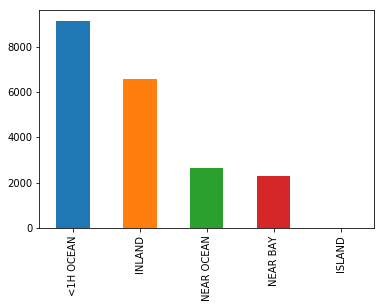

In [9]:
data["ocean_proximity"].value_counts().plot(kind="bar")

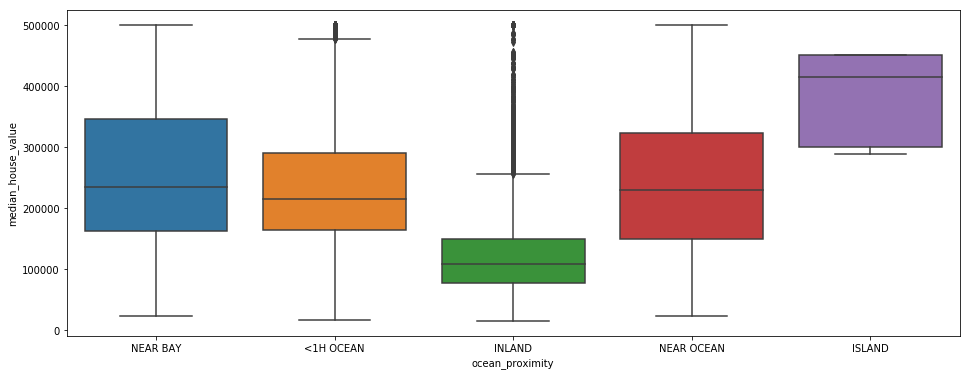

In [10]:
#box plot of house value based on ocean proximity categories
plt.figure(figsize=(16,6))
sns.boxplot(data.ocean_proximity,data.median_house_value)

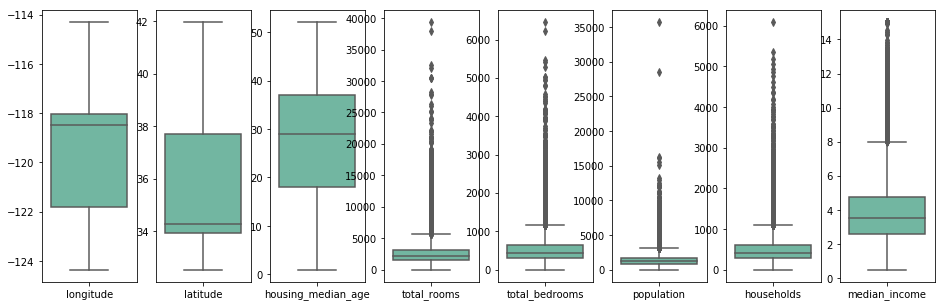

In [11]:
fig, axes = plt.subplots(ncols=8, figsize=(16, 5))

sns.boxplot(data=data[['longitude']],  palette='Set2', ax=axes[0]);
sns.boxplot(data=data[['latitude']]  ,  palette='Set2', ax=axes[1]);
sns.boxplot(data=data[['housing_median_age']], palette='Set2', ax=axes[2]);
sns.boxplot(data=data[['total_rooms']],  palette='Set2', ax=axes[3]);

sns.boxplot(data=data[['total_bedrooms']],   palette='Set2', ax=axes[4]);
sns.boxplot(data=data[['population']]  ,  palette='Set2', ax=axes[5]);
sns.boxplot(data=data[['households']],   palette='Set2', ax=axes[6]);
sns.boxplot(data=data[['median_income']],   palette='Set2', ax=axes[7]);

In [12]:
corr=data.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


In [13]:
#here medium_income and median_house_value are highly correlated

In [14]:
corr.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

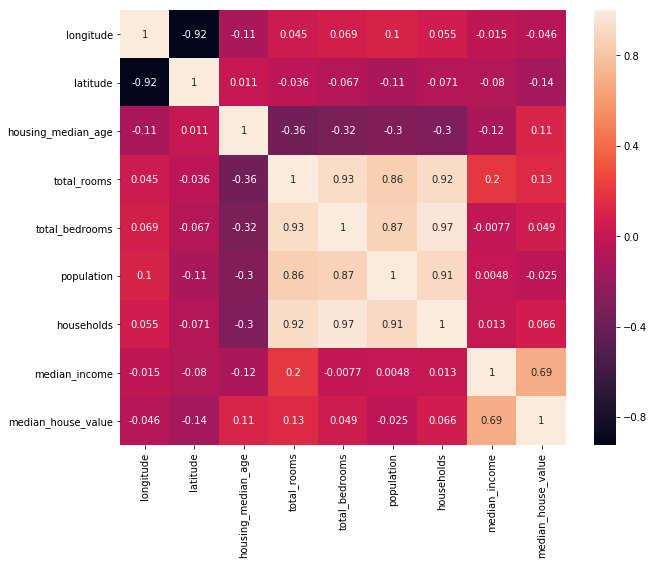

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [16]:
data = pd.concat([data,pd.get_dummies(data.ocean_proximity)],axis=1)
data.drop(['ocean_proximity'],axis=1,inplace=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [17]:
#standardized the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
X=data.drop(['median_house_value'],axis=1).values
y=data.iloc[:,8].values.reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [20]:
#linear regressor
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
model1.intercept_

array([-2242342.60923965])

In [22]:
model1.coef_

array([[-2.66812083e+04, -2.51966701e+04,  1.07320102e+03,
        -6.21238891e+00,  8.71204511e+01, -3.70696959e+01,
         6.17688179e+01,  3.97629971e+04, -2.39232098e+04,
        -6.29232946e+04,  1.31669210e+05, -2.68434838e+04,
        -1.79792214e+04]])

In [23]:
feature_cols = data.drop(['median_house_value'], axis=1).columns
feature_cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [24]:
y_pred = model1.predict(X_test)

In [25]:
from sklearn import metrics
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  50029.663233052815
Mean Sq  Error MSE      :  4776927832.090282
Root Mean Sq Error RMSE :  69115.32270119472
r2 value                :  0.6366479562027039


In [26]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
model2 =  DecisionTreeRegressor(random_state=0)
model2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [27]:
y_pred2 = model2.predict(X_test)

In [28]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred2))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred2))

Mean Abs Error   MAE    :  44216.1430878553
Mean Sq  Error MSE      :  4909173600.590762
Root Mean Sq Error RMSE :  70065.49507846756
r2 value                :  0.6265888194610112


In [ ]:
#Random Forest Regression
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

C:\Users\biswadip chatterjee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
clf.feature_importances_

In [ ]:
list(zip(feature_cols, clf.feature_importances_))

In [ ]:
y_pred3 = clf.predict(X_test)

In [ ]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred3))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred3))

In [ ]:
#Bonus ELinear Regression with one independent variable
X1=data.iloc[:,7].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=1, test_size=0.3)
model4 = LinearRegression()
model4.fit(X_train,y_train)

In [ ]:
y_pred4 =model4.predict(X_test)

In [ ]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred4))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred4))

In [ ]:
test = pd.DataFrame({'Predicted':list(y_pred4),'Actual':list(y_test)})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

In [ ]:
#1st model  is the best model with r2 =0.63